<a href="https://colab.research.google.com/github/MaxVieiraSantiago/Machine-Learning-Algorithms/blob/master/Linear%20Regression/Regress%C3%A3o_Linear_M%C3%BAltipla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regressao Linear Múltipla**

In [4]:
import pandas as pd
import numpy as np

In [54]:
file = '/content/drive/MyDrive/Udemy/enem_2019_tratado.csv'
dados = pd.read_csv( file, sep=',', encoding='iso-8859-1' )

# **Análise Inicial**

In [55]:
dados.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,NO_MUNICIPIO_ESC,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NOTA_CN,NOTA_CH,NOTA_LC,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
0,"1,90E+11",Santa Isabel,22,M,1,parda,1,1,não_respondeu,NaN,NaN,1,1,1,1,564.6,585.8,592.9,600.2,Inglês,1.0,160.0,200.0,180.0,200.0,200.0,940.0,Sim
1,"1,90E+11",São Paulo,17,F,1,parda,1,2,privada,15567761.0,Belém,1,1,1,1,576.2,641.1,634.3,731.8,Inglês,1.0,160.0,120.0,200.0,200.0,200.0,880.0,Não
2,"1,90E+11",São Bernardo do Campo,19,M,1,parda,1,2,pública,35904958.0,São Bernardo do Campo,1,1,1,1,402.2,424.8,509.6,393.2,Espanhol,1.0,80.0,160.0,120.0,100.0,100.0,560.0,Sim
3,"1,90E+11",Embu-Guaçu,17,F,1,parda,1,2,pública,NaN,NaN,1,1,1,1,399.6,426.8,487.2,419.2,Inglês,1.0,120.0,120.0,120.0,120.0,80.0,560.0,Sim
4,"1,90E+11",Guarulhos,23,F,1,branca,1,1,não_respondeu,NaN,NaN,1,1,1,1,625.7,646.5,629.3,796.1,Inglês,1.0,160.0,200.0,180.0,180.0,160.0,880.0,Sim


**Objetivo: criar um modelo de regressão linear múltipla para prever a nota da redação tendo como variáveis independentes as notas de seus componentes.**

In [56]:
dados.shape

(499940, 28)

**Selecionando apenas um dos colégios**

In [57]:
colegioX = dados.loc[dados['CO_ESCOLA'] == 35132287]
colegioX.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,NO_MUNICIPIO_ESC,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NOTA_CN,NOTA_CH,NOTA_LC,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
17,"1,90E+11",São Paulo,18,F,1,branca,1,2,privada,35132287.0,São Paulo,1,1,1,1,585.9,625.6,597.4,49.1,Inglês,1.0,160.0,140.0,140.0,160.0,160.0,760.0,Sim
10760,"1,90E+11",São Paulo,17,M,1,parda,1,2,privada,35132287.0,São Paulo,1,1,1,1,769.3,634.3,616.9,930.5,Inglês,1.0,180.0,200.0,200.0,200.0,140.0,920.0,Sim
13315,"1,90E+11",São Paulo,17,F,1,branca,1,2,privada,35132287.0,São Paulo,1,1,1,1,651.5,647.1,601.9,663.9,Inglês,1.0,160.0,140.0,160.0,200.0,120.0,780.0,Sim
20006,"1,90E+11",São Paulo,17,F,1,branca,1,2,privada,35132287.0,São Paulo,1,1,1,1,565.3,552.9,599.2,771.9,Inglês,1.0,140.0,180.0,160.0,180.0,140.0,800.0,Sim
26697,"1,90E+11",São Paulo,18,F,1,branca,1,2,privada,35132287.0,São Paulo,1,1,1,1,585.6,615.4,627.7,663.1,Inglês,1.0,160.0,200.0,200.0,200.0,200.0,960.0,Sim


In [58]:
colegioX.shape

(130, 28)

**Valores Missing**

In [59]:
colegioX.isnull().sum()

NU_INSCRICAO               0
NO_MUNICIPIO_RESIDENCIA    0
IDADE                      0
SEXO                       0
TP_ESTADO_CIVIL            0
RACA                       0
TP_NACIONALIDADE           0
TP_ST_CONCLUSAO            0
ESCOLA                     0
CO_ESCOLA                  0
NO_MUNICIPIO_ESC           0
TP_PRESENCA_CN             0
TP_PRESENCA_CH             0
TP_PRESENCA_LC             0
TP_PRESENCA_MT             0
NOTA_CN                    0
NOTA_CH                    0
NOTA_LC                    0
NOTA_MT                    0
TP_LINGUA                  0
TP_STATUS_REDACAO          0
COMP1                      0
COMP2                      0
COMP3                      0
COMP4                      0
COMP5                      0
NOTA_REDACAO               0
INTERNET                   0
dtype: int64

In [60]:
# Análise dos tipos de atributos
colegioX.dtypes

NU_INSCRICAO                object
NO_MUNICIPIO_RESIDENCIA     object
IDADE                        int64
SEXO                        object
TP_ESTADO_CIVIL              int64
RACA                        object
TP_NACIONALIDADE             int64
TP_ST_CONCLUSAO              int64
ESCOLA                      object
CO_ESCOLA                  float64
NO_MUNICIPIO_ESC            object
TP_PRESENCA_CN               int64
TP_PRESENCA_CH               int64
TP_PRESENCA_LC               int64
TP_PRESENCA_MT               int64
NOTA_CN                    float64
NOTA_CH                    float64
NOTA_LC                    float64
NOTA_MT                    float64
TP_LINGUA                   object
TP_STATUS_REDACAO          float64
COMP1                      float64
COMP2                      float64
COMP3                      float64
COMP4                      float64
COMP5                      float64
NOTA_REDACAO               float64
INTERNET                    object
dtype: object

# **Regressão Múltipla com StatsModels**

# **MODELO 1**

In [61]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [62]:
# Criação do modelo 1
modelo1 = smf.ols( 'NOTA_REDACAO ~ COMP2 + COMP4 + COMP5', data = colegioX).fit()

In [63]:
residuos = modelo1.resid
residuos

17        -4.498054
10760     33.309358
13315     -5.718021
20006    -26.432059
26697      1.349594
            ...    
426829    35.760528
428241   -17.683137
443242   -17.497499
462446   -56.783460
483420    34.529325
Length: 130, dtype: float64

# **1º Teste de Normalidade dos Resíduos**

In [64]:
import scipy.stats as stats

Ho = Distribuição Normal: p > 0.05

Ha = Distribuição != Normal: p <= 0.05

In [65]:
estatistica, p = stats.shapiro( residuos )
print("Estatística de teste: {:.2f}%".format(estatistica * 100))
print('p-valoe: {}'.format(p))

Estatística de teste: 98.47%
p-valoe: 0.15436169505119324


In [66]:
import matplotlib.pyplot as plt

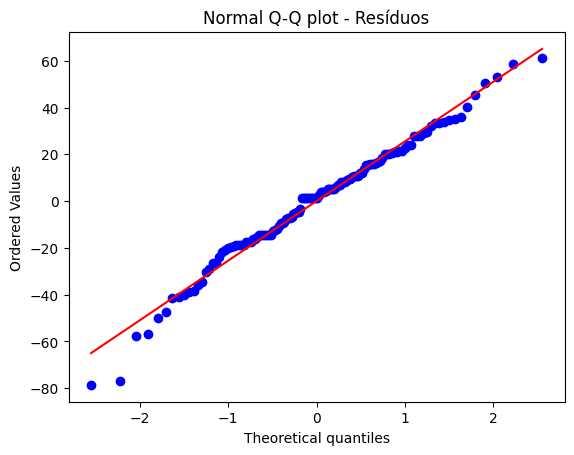

In [67]:
stats.probplot(residuos, dist='norm', plot=plt)
plt.title('Normal Q-Q plot - Resíduos')
plt.show()

# **2º Análise da Homocedasticidade dos Resíduos**

( Resíduos com Variação Constante )

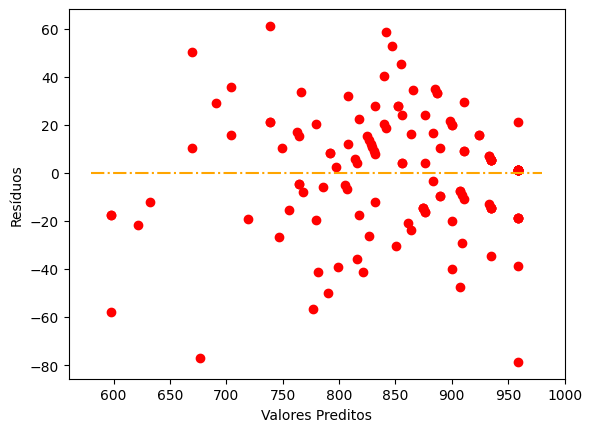

In [68]:
plt.scatter(x=modelo1.predict(), y=residuos, color='red')
plt.hlines(0, xmin=580, xmax=980, color='orange', linestyles='dashdot')
plt.ylabel('Resíduos')
plt.xlabel('Valores Preditos')
plt.show()

Teste Breusch-Pagan (Homocedasticidade ou Heterocedasticidade)

Ho = existe Homocedasticidade: p > 0.05

Ha = não existe Homocedasticidade: p <= 0.05

In [69]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

In [70]:
estatistica, p, f, fp = sms.het_breuschpagan( modelo1.resid, modelo1.model.exog )
print("Estatística do teste: {}%".format(estatistica))
print('p-valor: {}'.format(p))
print('f-valor: {}'.format(f))
print('f_p-valor: {}'.format(fp))

Estatística do teste: 7.939832568694114%
p-valor: 0.047271689874476004
f-valor: 2.732037608197022
f_p-valor: 0.04659801474386854


### **Outliers nos Resíduos**

( Entre -3 e 3 )

In [71]:
outliers = modelo1.outlier_test()
print(outliers.max())
print(outliers.min())

student_resid    2.466219
unadj_p          0.957876
bonf(p)          1.000000
dtype: float64
student_resid   -3.260297
unadj_p          0.001434
bonf(p)          0.186452
dtype: float64


### **Independência dos Resíduos (Durbin-Watson)**

Ideal **para medidas repetidas** (longitudinais: Ex: mesmo aluno )

A estatística de teste é aproximadamente igual a 2 * (1 - r) onde r é a automcorrelação da amostra dos resíduos. Assim, para r = 0, a estatística de teste é igual a 2, indicando independência dos resíduos (o resultado vai de 0 a 4)

In [72]:
import statsmodels
from statsmodels.tools.sm_exceptions import ValueWarning

In [73]:
estatistica = statsmodels.stats.stattools.durbin_watson(modelo1.resid)
print('Estatística do teste: {}'.format(estatistica))

Estatística do teste: 2.0810835654651636


### **Ausência de Multicolinearidade**

Somente entre variáveis independentes

Considera multicolinearidade quando r > 0.9

In [74]:
variaveis = colegioX[['COMP2', 'COMP4', 'COMP5']]
variaveis.head()

,COMP2,COMP4,COMP5
17,140.0,160.0,160.0
10760,200.0,200.0,140.0
13315,140.0,200.0,120.0
20006,180.0,180.0,140.0
26697,200.0,200.0,200.0


In [75]:
correlacoes = variaveis.corr(method='pearson')
correlacoes

,COMP2,COMP4,COMP5
COMP2,1.000000,0.375906,0.298434
COMP4,0.375906,1.000000,0.428872
COMP5,0.298434,0.428872,1.000000


Usando Fator de Inflação de Variância (VIF) < 5; ausência de multicolinearidade

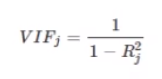

In [76]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [77]:
# função espera a presença de uma constante na matriz de variáveis explicativas
vif = add_constant(variaveis)

pd.Series([variance_inflation_factor(vif.values, j) for j in range(vif.shape[1])], index=vif.columns)

const    72.466982
COMP2     1.196714
COMP4     1.335832
COMP5     1.259221
dtype: float64

## **Análise do Modelo**

Intercept

p-valor para cada coeficiente < 0.05 (estatisticamente significativos)

Adjusted R-squared (explicação do modelo através dos dados)

p-valor da estatística F < 0.05 (valida o modelo de regressão)

In [78]:
print(modelo1.summary())

                            OLS Regression Results                            
Dep. Variable:           NOTA_REDACAO   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     507.2
Date:                Mon, 19 Feb 2024   Prob (F-statistic):           3.97e-70
Time:                        11:45:08   Log-Likelihood:                -604.30
No. Observations:                 130   AIC:                             1217.
Df Residuals:                     126   BIC:                             1228.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    116.1987     19.162      6.064      0.0

**Equação:** Nota Redação = 116.1987 + (COMP2 * 1.2831) + (COMP4 * 1.7298) + (COMP5 * 1.1993)

In [79]:
# Criando uma coluna com previsão
colegioX['previsao'] = modelo1.fittedvalues;

<ipython-input-79-ce11d61317e1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  colegioX['previsao'] = modelo1.fittedvalues;


In [80]:
colegioX.head(10)

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,NO_MUNICIPIO_ESC,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NOTA_CN,NOTA_CH,NOTA_LC,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET,previsao
17,"1,90E+11",São Paulo,18,F,1,branca,1,2,privada,35132287.0,São Paulo,1,1,1,1,585.9,625.6,597.4,49.1,Inglês,1.0,160.0,140.0,140.0,160.0,160.0,760.0,Sim,764.498054
10760,"1,90E+11",São Paulo,17,M,1,parda,1,2,privada,35132287.0,São Paulo,1,1,1,1,769.3,634.3,616.9,930.5,Inglês,1.0,180.0,200.0,200.0,200.0,140.0,920.0,Sim,886.690642
13315,"1,90E+11",São Paulo,17,F,1,branca,1,2,privada,35132287.0,São Paulo,1,1,1,1,651.5,647.1,601.9,663.9,Inglês,1.0,160.0,140.0,160.0,200.0,120.0,780.0,Sim,785.718021
20006,"1,90E+11",São Paulo,17,F,1,branca,1,2,privada,35132287.0,São Paulo,1,1,1,1,565.3,552.9,599.2,771.9,Inglês,1.0,140.0,180.0,160.0,180.0,140.0,800.0,Sim,826.432059
26697,"1,90E+11",São Paulo,18,F,1,branca,1,2,privada,35132287.0,São Paulo,1,1,1,1,585.6,615.4,627.7,663.1,Inglês,1.0,160.0,200.0,200.0,200.0,200.0,960.0,Sim,958.650406
26911,"1,90E+11",São Paulo,18,F,1,branca,1,2,privada,35132287.0,São Paulo,1,1,1,1,545.3,615.4,589.9,790.1,Inglês,1.0,160.0,120.0,160.0,160.0,180.0,780.0,Sim,762.822631
43814,"1,90E+11",São Paulo,18,M,1,branca,1,2,privada,35132287.0,São Paulo,1,1,1,1,556.7,577.2,576.9,671.4,Inglês,1.0,160.0,160.0,160.0,140.0,180.0,800.0,Sim,779.550082
43870,"1,90E+11",São Paulo,17,F,1,preta,2,2,privada,35132287.0,São Paulo,1,1,1,1,600.4,647.4,581.8,605.4,Inglês,1.0,140.0,200.0,160.0,180.0,180.0,860.0,Sim,900.067246
44150,"1,90E+11",São Paulo,17,F,1,amarela,1,2,privada,35132287.0,São Paulo,1,1,1,1,633.6,675.4,651.8,753.8,Inglês,1.0,160.0,200.0,200.0,200.0,200.0,960.0,Sim,958.650406
48417,"1,90E+11",São Paulo,17,M,1,branca,1,2,privada,35132287.0,São Paulo,1,1,1,1,616.4,679.5,609.4,908.7,Inglês,1.0,140.0,120.0,140.0,120.0,160.0,680.0,Sim,669.642901


# **MODELO 2**

In [81]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [82]:
# Criação do modelo
modelo2 = smf.ols('NOTA_REDACAO ~ COMP2 + COMP4', data=colegioX).fit()

In [83]:
residuos2 = modelo2.resid
residuos2

17         -5.800864
10760     -19.726164
13315     -73.382235
20006     -67.154169
26697      20.273836
             ...    
426829     46.771131
428241    -69.438183
443242    -52.144793
462446   -118.372859
483420     47.855207
Length: 130, dtype: float64

# **1º Teste de Normalidade dos Resíduos**

In [84]:
import scipy.stats as stats

Ho = Distribuição Normal: p > 0.05

Ha = Distribuição Não Normal: p <= 0.05

In [85]:
estatistica, p = stats.shapiro(residuos2)
print('Estatística de teste: {:.2f}%'.format(estatistica * 100))
print('p-value: {}'.format(p))

Estatística de teste: 98.48%
p-value: 0.15595780313014984


In [86]:
import matplotlib.pyplot as plt

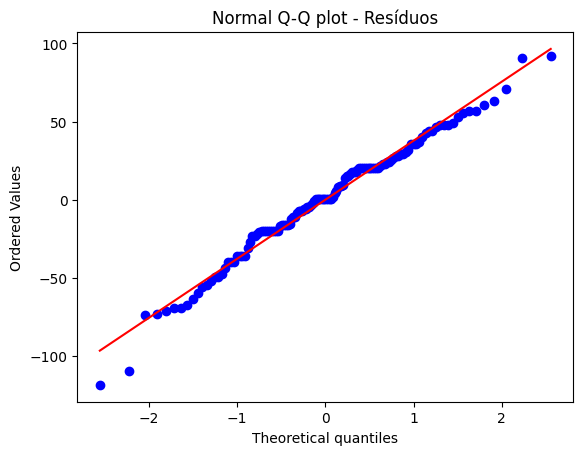

In [87]:
stats.probplot(residuos2, dist='norm', plot=plt)
plt.title('Normal Q-Q plot - Resíduos')
plt.show()

Análise da Homocedasticidade dos Resíduos

(resíduos com variância constante)

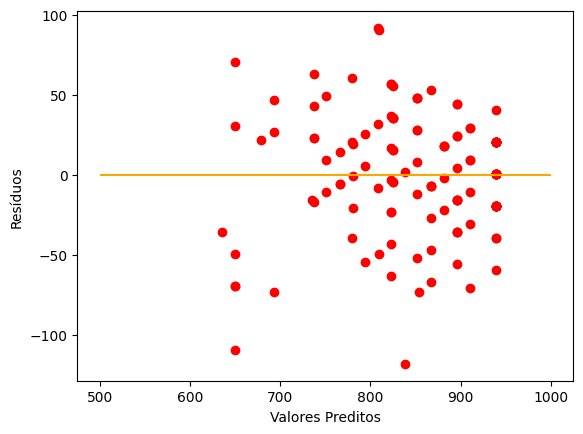

In [88]:
plt.scatter(x=modelo2.predict(), y=residuos2, color='red')
plt.hlines(y=0, xmin=500, xmax=1000, color='orange')
plt.ylabel('Resíduos')
plt.xlabel('Valores Preditos')
plt.show()

Teste Breusch-Pagan (Homocedasticidade ou Heterocedasticidade)

Ho = Existe Homocedasticidade: p > 0.05

Ha = Não Existe Homocedasticidade: p <= 0.05

In [89]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

In [90]:
estatistica, p, f, fp = sms.het_breuschpagan(modelo2.resid, modelo2.model.exog)

resultado_homocedasticidade=''
if (p <= 0.05):
  resultado_homocedasticidade = 'NÃO EXISTE HOMOCEDASTICIDADE ( bucar outro modelo )'
else:
  resultado_homocedasticidade = 'EXISTE HOMOCEDASTICIDADE'

print('Estatística do teste: {}'.format(estatistica))
print('p-valor: {}'.format(p), '=> {}'.format(resultado_homocedasticidade))
print('f-valor: {}'.format(f))
print('f_p-valor: {}'.format(fp))

Estatística do teste: 15.042745745701497
p-valor: 0.0005413887974310043 => NÃO EXISTE HOMOCEDASTICIDADE ( bucar outro modelo )
f-valor: 8.309300366021285
f_p-valor: 0.00040612282224010204


**NÃO EXISTE HOMOCEDASTICIDADE**

Mas vamos continuar apenas como forma de conhecimento!

# **Outliers dos Resíduos**

(Entre -3 e 3)

In [91]:
outliers = modelo2.outlier_test()

minimo = outliers.min()[0]
maximo = outliers.max()[0]

In [92]:
if (minimo < -3) or (maximo > 3):
  print('(Entre {} e {}) => FORA DA FAIXA'.format(minimo, maximo))
else:
  print('(Entre {} e {}) => DENTRO DA FAIXA'.format(minimo, maximo))


(Entre -3.2542770590024817 e 2.5218461500824616) => FORA DA FAIXA


# **Independência dos Resíduos (Durbin-Watson)**

Ideal **para medidas repetidas** (longitudinais: Ex: mesmo aluno)

A estatística de teste é aproximadamente igual a **2 * (1 - r)** onde **r** é a automcorrelação da amostra dos resíduos. Assim, para r = 0, a estatística de teste é igual a 2, indicando independência dos resíduos (o resultado vai de 0 a 4)

In [93]:
import statsmodels
from statsmodels.tools.sm_exceptions import ValueWarning

In [94]:
estatistica = statsmodels.stats.stattools.durbin_watson(modelo2.resid)

In [95]:
print('Estatística do teste: {}'.format(estatistica))

Estatística do teste: 1.7307261063145127


# **Ausência de Multicolinearidade**

Somente entre as variáveis independentes

Considera multicolinearidade quando r > 0.9

In [96]:
variaveis2 = colegioX[['COMP2','COMP4']]

In [97]:
variaveis2.head()

,COMP2,COMP4
17,140.0,160.0
10760,200.0,200.0
13315,140.0,200.0
20006,180.0,180.0
26697,200.0,200.0


In [98]:
correlacoes = variaveis2.corr(method='pearson')
correlacoes

,COMP2,COMP4
COMP2,1.000000,0.375906
COMP4,0.375906,1.000000


Usando Fator de Inflação de Variância (VIF) < 5; ausência de multicolinearidade

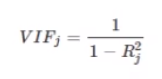

In [99]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [100]:
# função espera a presença de uma constante na matriz de variáveis explicativas
vif = add_constant(variaveis2)

pd.Series([variance_inflation_factor(vif.values, j) for j in range(vif.shape[1])], index=vif.columns)

const    59.966319
COMP2     1.164559
COMP4     1.164559
dtype: float64

# **Análise do Modelo**

Intercept

p-valor para cada coeficiente < 0.05 (estatisticamente significativos)

Adjusted R-squared (explicação do modelo através dos dados)

p-valor da estatística F < 0.05 (valida o modelo de regressão)

In [101]:
print(modelo2.summary())

                            OLS Regression Results                            
Dep. Variable:           NOTA_REDACAO   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     314.2
Date:                Mon, 19 Feb 2024   Prob (F-statistic):           6.76e-50
Time:                        11:45:22   Log-Likelihood:                -655.51
No. Observations:                 130   AIC:                             1317.
Df Residuals:                     127   BIC:                             1326.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    214.0062     25.745      8.313      0.0

**Equação:** Nota Redação = 214214.0062 + (COMP2 * 1.4391) + (COMP4 * 2.1895)

In [102]:
# Criando uma coluna com as previsões
colegioX['previsao2'] = modelo2.fittedvalues

<ipython-input-102-199ba552875f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  colegioX['previsao2'] = modelo2.fittedvalues


In [103]:
colegioX.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,NO_MUNICIPIO_ESC,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NOTA_CN,NOTA_CH,NOTA_LC,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET,previsao,previsao2
17,"1,90E+11",São Paulo,18,F,1,branca,1,2,privada,35132287.0,São Paulo,1,1,1,1,585.9,625.6,597.4,49.1,Inglês,1.0,160.0,140.0,140.0,160.0,160.0,760.0,Sim,764.498054,765.800864
10760,"1,90E+11",São Paulo,17,M,1,parda,1,2,privada,35132287.0,São Paulo,1,1,1,1,769.3,634.3,616.9,930.5,Inglês,1.0,180.0,200.0,200.0,200.0,140.0,920.0,Sim,886.690642,939.726164
13315,"1,90E+11",São Paulo,17,F,1,branca,1,2,privada,35132287.0,São Paulo,1,1,1,1,651.5,647.1,601.9,663.9,Inglês,1.0,160.0,140.0,160.0,200.0,120.0,780.0,Sim,785.718021,853.382235
20006,"1,90E+11",São Paulo,17,F,1,branca,1,2,privada,35132287.0,São Paulo,1,1,1,1,565.3,552.9,599.2,771.9,Inglês,1.0,140.0,180.0,160.0,180.0,140.0,800.0,Sim,826.432059,867.154169
26697,"1,90E+11",São Paulo,18,F,1,branca,1,2,privada,35132287.0,São Paulo,1,1,1,1,585.6,615.4,627.7,663.1,Inglês,1.0,160.0,200.0,200.0,200.0,200.0,960.0,Sim,958.650406,939.726164


# **Comparação entre Modelos**

**Critério de Informação de Akaike (AIC)**

O melhor modelo é com o resultado **MENOR** (*menor variação dos resíduos*).

In [104]:
modelo1.aic

1216.59304638052

In [105]:
modelo2.aic

1317.0150160308585

**Critério de Informação Bayesiano (BIC)**

O melhor modelo é com o resultado **MENOR** (*menor variação dos resíduos*)

In [106]:
modelo1.bic

1228.0631841823424

In [107]:
modelo2.bic

1325.6176193822253

**Coeficiente de Determinação ( R^2 )**

In [119]:
print('R-squared: {:.3f}%'.format(modelo1.rsquared * 100))
print('Adj. R-squared: {:.3f}%'.format(modelo1.rsquared_adj * 100))

R-squared: 92.353%
Adj. R-squared: 92.171%


In [120]:
print('R-squared: {:.3f}%'.format(modelo2.rsquared * 100))
print('Adj. R-squared: {:.3f}%'.format(modelo2.rsquared_adj * 100))

R-squared: 83.186%
Adj. R-squared: 82.921%
